<a href="https://colab.research.google.com/github/Alexandre77777/python_programming/blob/main/4.%20%D0%9A%D0%BE%D0%B4%20%D1%81%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B9/4.%20%D0%9A%D0%BE%D0%B4_%D1%81_%D0%BF%D0%B0%D1%80%D1%8B_29_09_2023_%D0%97%D0%B0%D0%BC%D1%8B%D0%BA%D0%B0%D0%BD%D0%B8%D1%8F_%D0%94%D0%B5%D0%BA%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B_%D0%98%D1%82%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Области видимости переменных в Python (Повторение)**

### Перед тем как перейти к рассмотрению примеров реализации замыканий на Python, для начала вспомним тему **«область видимости переменных»**.



Обычно, по области видимости, переменные делят на **глобальные** и **локальные**. Глобальные существуют в течение всего времени выполнения программы, а локальные создаются внутри методов, функций и прочих блоков кода. При этом, после выхода из такого блока, переменная удаляется из памяти.

> Что касается Python, то тут выделяют **четыре области видимости** для переменных:

1. **Local (Локальная)**   
   Эту область видимости имеют переменные, которые создаются и используются **внутри функций**. В данной программе объявлена функция `add_two()`, которая прибавляет двойку к переданному ей числу и возвращает полученный результат. Внутри этой функции используется переменная `x`, доступ к которой **снаружи невозможен**. К тому же, эта переменная удаляется из памяти каждый раз (во всяком случае, должна удаляться), когда завершается `add_two()`.

In [ ]:
def add_two(a):
        x = 2
        return a + x

In [ ]:
add_two(3)

5

In [ ]:
print(x)

NameError: name 'x' is not defined

В данной программе объявлена функция add_two(), которая прибавляет двойку к переданному ей числу и возвращает полученный результат. Внутри этой функции используется переменная x, доступ к которой снаружи невозможен. К тому же, эта переменная удаляется из памяти каждый раз (во всяком случае, должна удаляться), когда завершается add_two().

2. **Enclosing (Объемлющая)**  
   Если есть **вложенные функции**, переменная основной функции — *enclosing* для вложенных функций.

   Суть данной области видимости в том, что внутри функции могут быть вложенные функции и локальные переменные. Так вот, локальная переменная функции для ее вложенной функции находится в *enclosing* области видимости.

   ```python
   def print_msg(msg):
       # объемлющая функция
       def printer():
           # вложенная функция
           print(msg)
       printer()
   
   # Output: Hello
   print_msg("Hello")
   ```

In [ ]:
def add_four(a):
        x = 2
        def add_some():
            print("x = " + str(x))
            return a + x
        return add_some()

In [ ]:
print(add_four(5))

x = 2
7


3. **Global (Глобальная)**

   Переменные области видимости `global` — это **глобальные переменные уровня модуля** (модуль — это файл с расширением `.py`).

   В приведенном выше коде переменная `x` — это глобальная переменная. Доступ к ней можно получить из любой функции, объявленной в данном модуле. Но если мы этот модуль импортируем в каком-то другом модуле, то `x` для него **уже не будет** переменной уровня `global`.

In [ ]:
x = 5

def fun():
  print(x+3)

In [ ]:
fun()

8


В приведенном выше коде переменная x – это global переменная. Доступ к ней можно получить из любой функции объявленной в данном модуле. Но если мы этот модуль импортируем в каком-то другом модуле, то x для него уже не будет переменной уровня global.

4. **Built-in (Уровень Python интерпретатора)**

   В раках этой области видимости находятся функции `open`, `len` и т.п., также туда входят исключения. Эти сущности доступны **в любом модуле Python** и не требуют предварительного импорта. `Built-in` — это максимально широкая область видимости.

# **1. Замыкание (closure)**



> **Замыкание (closure)** в программировании — это функция, в теле которой присутствуют ссылки на переменные, объявленные **вне тела этой функции** в окружающем коде и не являющиеся ее параметрами.

Другими словами, замыкание — это функция, которая ссылается на свободные переменные в своём контексте.

Как уже было сказано ранее, каждый раз, когда мы вызываем функцию, у нее создаются локальные переменные (если они у нее есть), а после завершения — уничтожаются. При очередном вызове эта процедура повторяется.

---

> *Можно ли сделать так, чтобы после завершения работы функции, часть локальных переменных не уничтожалась, а сохраняла свои значение до следующего запуска?*

**Да, это можно сделать!**

---

Локальная переменная не будет уничтожена, если на нее где-то останется "живая" ссылка после завершения работы функции. Эту ссылку может сохранять вложенная функция. Функции, построенные по такому принципу, могут использоваться для построения специализированных функций, т.е. являются **фабриками функций**. Далее будет рассмотрен вопрос создания и использования замыканий в Python, которые как раз и используют эту идею.

## **Пример использования замыкания в Python**


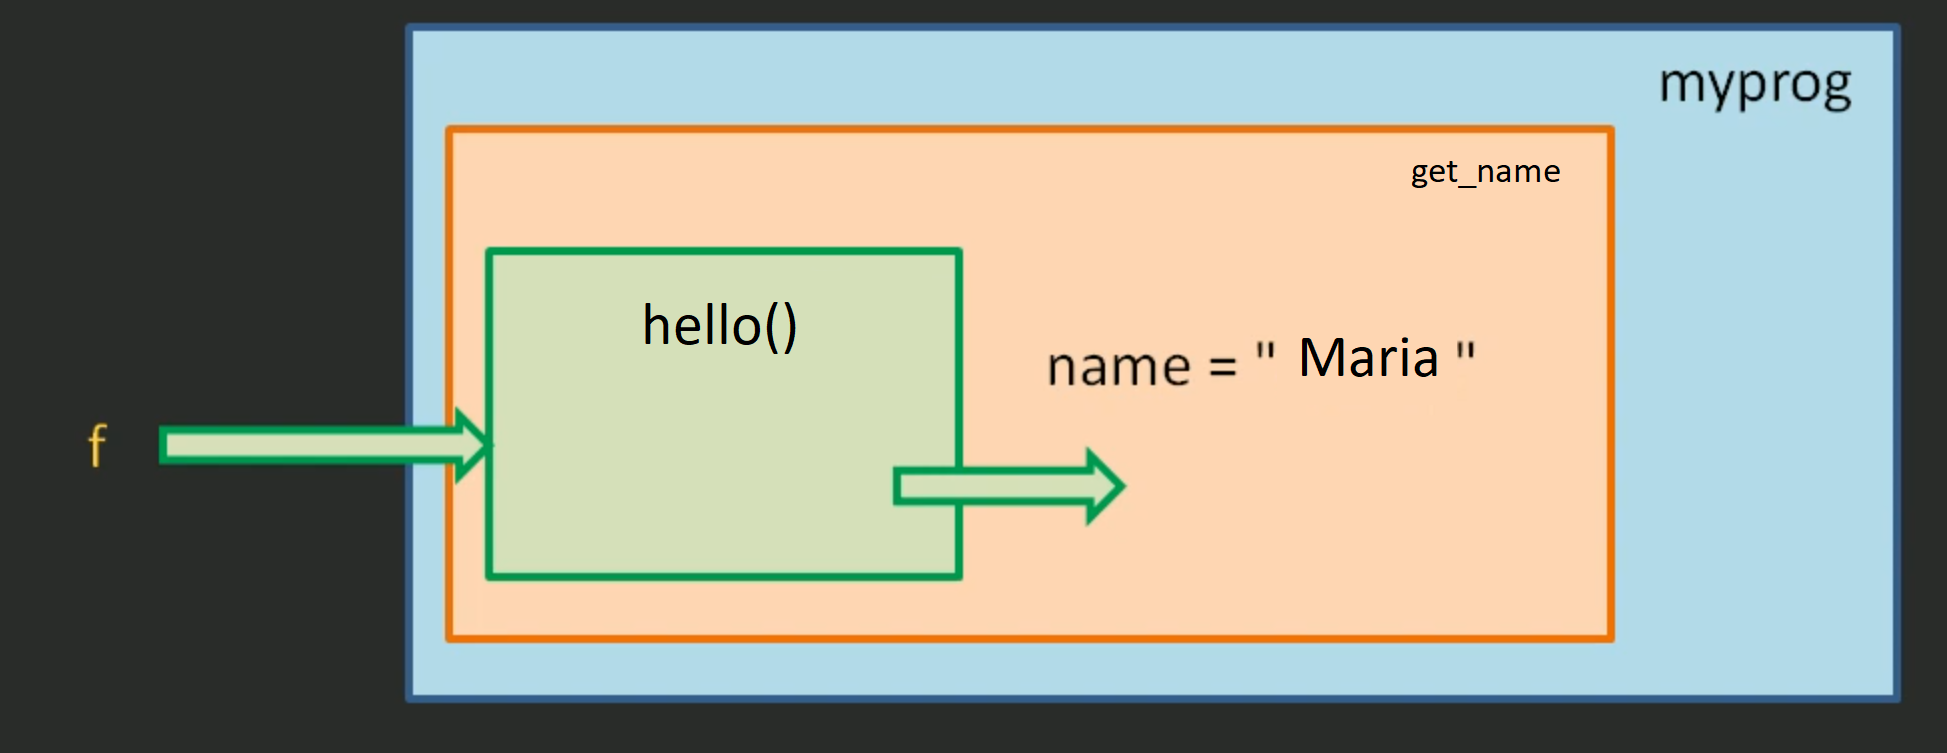

In [ ]:
def get_name(name):
    # Определяем вложенную функцию hello
    def hello():
        # Используем переменную name из внешней области видимости
        print(f"Hello, {name}!")
    # Возвращаем функцию hello без её вызова
    return hello # В этот момент создаётся замыкание: функция `hello` вместе с
                 # окружением, которое включает переменную `name` со значением "`Maria"`.
                 # Замыкание фиксирует свободные переменные — переменные, которые
                 # не являются локальными для `hello`, но используются в ней.
                 # В нашем случае, это переменная `name`.

In [ ]:
# Вызываем функцию get_name с аргументом "Maria" и сохраняем результат в переменную f
f = get_name("Maria")
# Вызываем функцию f, которая фактически является функцией hello()
f()

Hello, Maria!


**Пояснение:**

1. **Функция `get_name(name)`**

   - **Что делает:** Принимает один аргумент `name`.
   - **Внутри функции:**
     - Определяется **вложенная функция** `hello()`, которая не принимает аргументов.
     - Внутри `hello()` вызывается `print(f"Hello, {name}!")`, где `name` берётся из внешней области видимости.
   - **Возвращаемое значение:** Функция `get_name` возвращает объект функции `hello`, но не вызывает её.

2. **Создание замыкания**

   - При вызове `get_name("Maria")` создаётся замыкание.
   - Замыкание — это функция (`hello`), которая запоминает значения из окружающей области видимости (в данном случае `name = "Maria"`).

3. **Присвоение функции переменной `f`**

   - Результат вызова `get_name("Maria")` (т.е. функция `hello`) присваивается переменной `f`.
   - Теперь `f` — это функция, которая при вызове будет использовать сохранённое значение `name`.

4. **Вызов функции `f()`**

   - При вызове `f()` выполняется функция `hello()`, которая выводит `Hello, Maria!`.
   - `hello()` использует значение `name`, сохранённое в замыкании.

**Основные моменты:**

- **Замыкание:** В этом примере `hello()` является замыканием, так как она сохранила состояние переменной `name` из окружающей области видимости (`get_name`), даже после того, как `get_name` завершила работу.
- **Использование вложенных функций:** Вложенная функция может обращаться к переменным внешней функции.
- **Фабрика функций:** `get_name` действует как фабрика, создавая новые функции `hello`, настроенные на определённое имя.

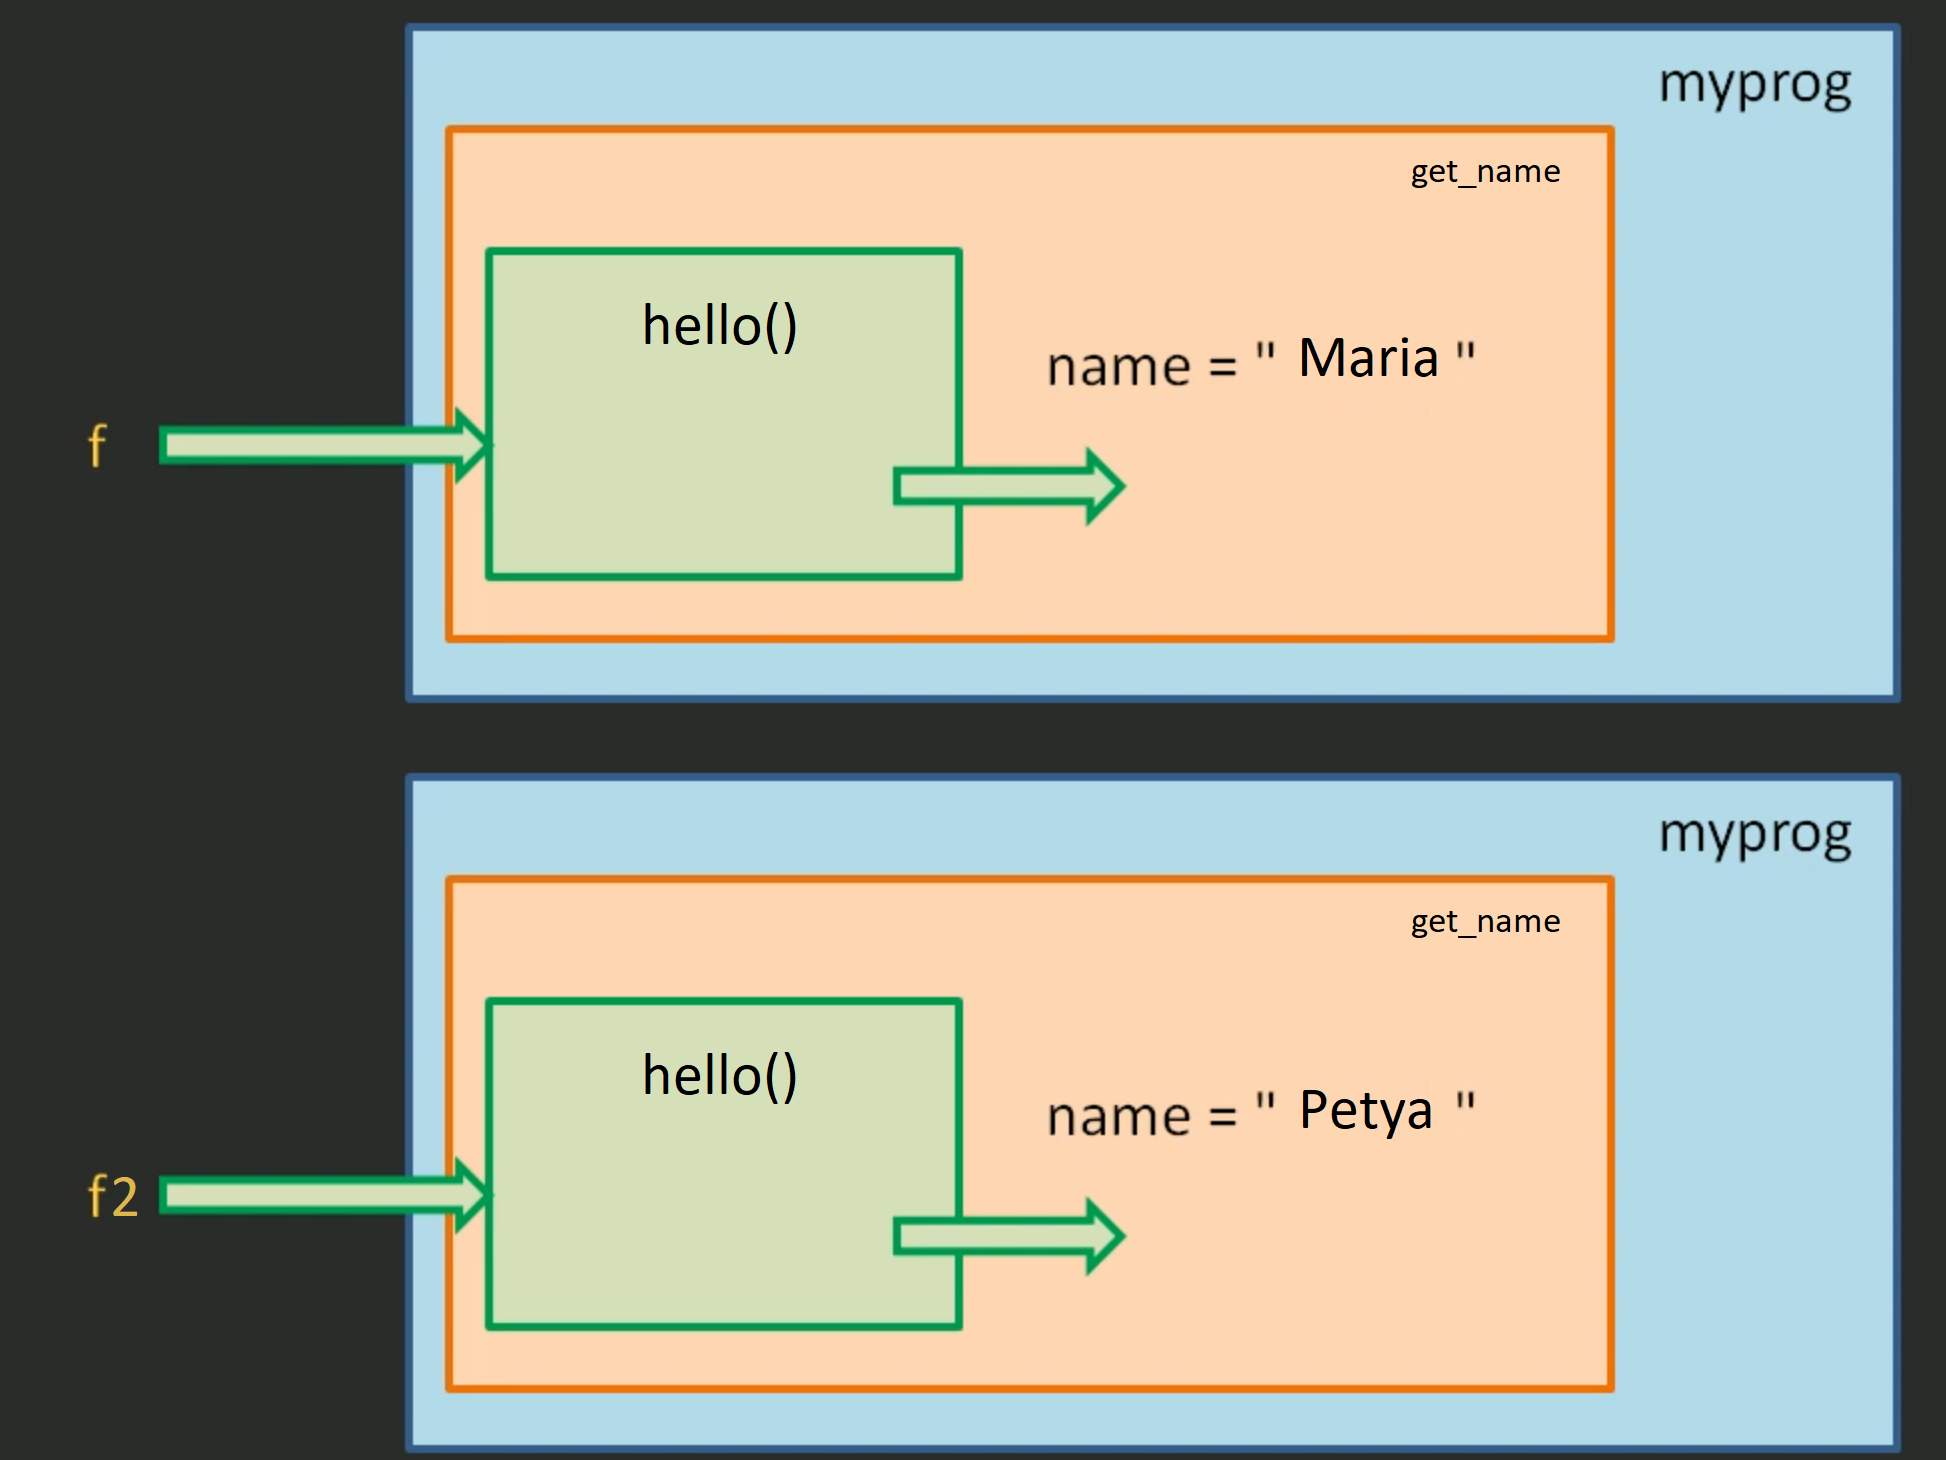

На картинке показаны два вызова `get_name`:

1. `f = get_name("Maria")` - создает замыкание, где `name = "Maria"`.
2. `f2 = get_name("Petya")` - создает другое замыкание, где `name = "Petya"`.

Каждое замыкание сохраняет свою собственную версию переменной `name`.

In [ ]:
f = get_name("Maria")
f2 = get_name("Petya")
f()
f2()

Hello, Maria!
Hello, Petya!


## **Когда стоит использовать замыкания?**


Замыкания позволяют избежать использования глобальных (`global`) значений и обеспечивают некоторую форму **сокрытия данных**. Для этого также может использоваться **объектно-ориентированный подход**.

Если в классе необходимо реализовать небольшое количество методов (в большинстве случаев **один метод**), замыкания могут обеспечить альтернативное и более элегантное решение. Но когда количество атрибутов и методов становится больше, лучше реализовать **класс**.

In [ ]:
def strip_string(strip_chars=" "):  # Базовая функция принимает на вход строку символов для удаления, по умолчанию пробел
    def do_strip(string):  # Вложенная функция, которая принимает строку для обработки
        return string.strip(strip_chars)  # Возвращает строку с удалёнными символами strip_chars в начале и в конце
    return do_strip  # Возвращаем вложенную функцию как объект

In [ ]:
# Создаём первую функцию-замыкание с использованием символов по умолчанию (пробелы)
strip1 = strip_string()

# Создаём вторую функцию-замыкание с указанными символами для удаления
strip2 = strip_string('!@#$')

In [ ]:
# Используем первую функцию для обработки строки с лишними пробелами
print(strip1("          HELLO!               "))  # Выведет: 'HELLO!'

# Используем вторую функцию для обработки строки с специальными символами
print(strip2("!!!!!HELLO!$$$#@"))  # Выведет: 'HELLO'

HELLO!
HELLO


# **2. Декораторы**

Декоратор в Python – это функция, которая в качестве аргумента принимает другую функцию и расширяет ее функционал без изменения последней.

#### *Кратко*

In [ ]:
def decorator_function(func):
    def wrapper():
        print('Функция-обёртка!')
        print('Оборачиваемая функция: {}'.format(func))
        print('Выполняем обёрнутую функцию...')
        func()
        print('Выходим из обёртки')
    return wrapper

Здесь decorator_function() является функцией-декоратором. Как вы могли заметить, она является функцией высшего порядка, так как принимает функцию в качестве аргумента, а также возвращает функцию. Внутри decorator_function() мы определили другую функцию, которая обёртывает функцию-аргумент и затем изменяет её поведение. Декоратор возвращает эту обёртку. Теперь посмотрим на декоратор в действии:

In [ ]:
@decorator_function
def hello_world():
  print('Hello world!')

In [ ]:
hello_world()

Функция-обёртка!
Оборачиваемая функция: <function hello_world at 0x790db4127f40>
Выполняем обёрнутую функцию...
Hello world!
Выходим из обёртки


* Добавив @decorator_function перед определением функции hello_world(), мы модифицировали её поведение. Однако как вы уже могли догадаться, выражение с @ является всего лишь синтаксическим сахаром для hello_world = decorator_function(hello_world).

* Иными словами, выражение @decorator_function вызывает decorator_function() с hello_world в качестве аргумента и присваивает имени hello_world возвращаемую функцию.

## Пример

Реализуем вычислительную функцию - алгоритм Евклида для поиска НОД двух натуральных чисел a и b

In [ ]:
def getNOD(a, b):
    while a != b:
        if a > b: a-= b
        else: b -= a
    return a

Далее, мы хотим создать тест для проверки скорости работы этой функции. Реализуем этот тест в виде декоратора.

Это будет выглядеть так:

In [ ]:
import time

def testTime(fn):
    def wrapper(*args):
        st = time.time()
        fn(*args)
        dt = time.time() - st
        print(f"Время работы: {dt} сек")
    return wrapper

**Пояснение:**

1. **Импорт модуля `time`**
   
   - **Что делает:** Импортирует модуль `time`, который предоставляет функции для работы со временем.
   - **Зачем нужно:** Этот модуль будет использоваться для измерения времени выполнения функции.

2. **Определение декоратора `testTime`**

   - **Что делает:** Создает функцию-декоратор `testTime`, которая принимает функцию `fn` в качестве аргумента.
   - **Внутри функции:**
     - Определяется **вложенная функция** `wrapper`, которая может принимать любое количество аргументов (`*args`).
     - `wrapper` измеряет время выполнения функции `fn` и выводит результат.
   - **Возвращаемое значение:** Функция `testTime` возвращает объект функции `wrapper`.

3. **Функция `wrapper`**

   - **Что делает:** Оборачивает вызов исходной функции `fn`, добавляя измерение времени выполнения.
   - **Внутри функции:**
     - Засекает начальное время с помощью `time.time()`.
     - Вызывает исходную функцию `fn(*args)`.
     - Вычисляет время выполнения, вычитая начальное время из текущего.
     - Выводит время выполнения в секундах.


**Основные моменты:**

- **Декоратор:** `testTime` является декоратором, который добавляет функциональность измерения времени к любой функции, к которой он применяется.
- **Замыкание:** Функция `wrapper` является замыканием, так как она сохраняет доступ к аргументу `fn` из внешней функции `testTime`.
- **Гибкость:** Использование `*args` позволяет применять этот декоратор к функциям с любым количеством аргументов.
- **Измерение производительности:** Этот код полезен для простого профилирования функций и оценки их производительности.

Внутри функции **testTime** (нашего декоратора) объявлена еще одна функция wrapper (обертка), внутри которой уже и происходит вызов некой функции fn. Далее замеряется время ее работы и информация выводится в консоль. И в конце сам декоратор возвращает ссылку на функцию wrapper.

В данном примере именно вложенная функция **wrapper** как раз и расширяет функционал для fn, не меняя ее саму. А благодаря оператору return мы имеем возможность вызывать эту обертку (**wrapper**) вот таким образом:

In [ ]:
test1 = testTime(getNOD)
test1(100000, 2)

Время работы: 0.006763458251953125 сек


То есть, декоратор testTime возвращает ссылку на wrapper, который в свою очередь будет вызывать getNOD и определять время выполнения именно этой функции при заданных аргументах.

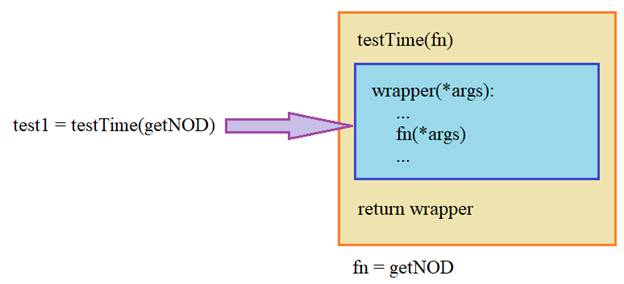

Мы могли бы записать декоратор и без wrapper, но это дает меньше гибкости в дальнейшем, в частности, при его вызове нам каждый раз нужно будет указывать функцию:

In [ ]:
def testTime2(fn, *args):
        st = time.time()
        fn(*args)
        dt = time.time() - st
        print(f"Время работы: {dt} сек")

In [ ]:
testTime2(getNOD, 100000, 2)

Время работы: 0.00590205192565918 сек


Первый вариант выглядит гораздо естественнее. Там мы имеем возможность создавать новое имя для функции и, затем, вызывать ее как новый, независимый объект.

Вернемся к первому варианту декоратора. И сразу отметим еще одну его особенность: обертка **wrapper** использует аргумент fn внешней функции **testTime**. Когда мы делаем вызов:

In [ ]:
test1 = testTime(getNOD)

у нас создаются два объекта-функции: testTime и wrapper. На wrapper ссылается глобальная переменная test1, а сам wrapper содержит ссылку на внешний контекст, т.е. на содержимое функции testTime, откуда и берет переменную fn. Благодаря наличию этой ссылки объект testTime не удаляется сборщиком мусора и продолжает существовать, пока существует wrapper - всё это благодаря **замыканию**, т.е. когда вложенная функция ссылается на контекст внешней функции и потому имеет возможность обращаться ко всем локальным переменным этого внешнего контекста.

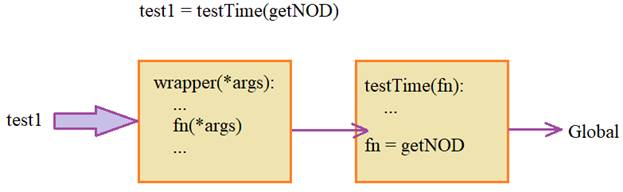

Напишем более оптимальную функцию для поиска НОД двух натуральных чисел a и b:

In [ ]:
def getFastNOD(a, b):
    if a < b: a,b = b,a
    while b: a,b = b, a%b
    return a

Сравним скорость работы двух функций, используя декоратор testTime():

In [ ]:
test1 = testTime(getNOD)
test2 = testTime(getFastNOD)

test1(100000, 2)
test2(100000, 2)

Время работы: 0.005624532699584961 сек
Время работы: 1.6689300537109375e-06 сек


Функцию wrapper можно записать в еще более универсальном виде, добавив необязательный список возможных именованных параметров:

In [ ]:
def testTime(fn):
    def wrapper(*args, **kwargs):
        st = time.time()
        fn(*args, **kwargs)
        dt = time.time() - st
        print(f"Время работы: {dt} сек")
    return wrapper

Так мы сможем вызывать и тестировать на скорость работы любые функции.

 Общий синтаксис использования декораторов в Python:


In [ ]:
@testTime
def getNOD(a, b):
    while a != b:
        if a > b: a-= b
        else: b -= a
    return a

In [ ]:
getNOD(100000,2)

Время работы: 0.009511947631835938 сек


И теперь при ее вызове будет запускаться указанный декоратор. А вот вызов второй функции:

In [ ]:
getFastNOD(100000, 2)

2

никак не связан с декоратором – это просто вычисление НОД для двух чисел. Если же мы и у нее укажем вызов декоратора: @testTime, то при запуске программы увидим время ее работы.

In [ ]:
@testTime
def getFastNOD(a, b):
    if a < b: a,b = b,a
    while b: a,b = b, a%b
    return a

In [ ]:
getFastNOD(100000, 2)

Время работы: 2.1457672119140625e-06 сек


Таким образом, в Python можно расширять функционал отдельных функций, не меняя их содержимого.

Если целевая функция fn возвращает какое-либо значение, то это легко можно предусмотреть в обертке:

In [ ]:
def testTime(fn):
    def wrapper(*args, **kwargs):
        st = time.time()
        res = fn(*args, **kwargs)
        dt = time.time() - st
        print(f"Время работы: {dt} сек")
        return res # Добаляем return для работы со значением, возвращаемым целевой функцией
    return wrapper

@testTime
def getNOD(a, b):
    while a != b:
        if a > b: a-= b
        else: b -= a
    return a

И, теперь, мы можем получить еще и результат работы функции getNOD:



In [ ]:
print(getNOD(100000,2))

Время работы: 0.006743431091308594 сек
2


Реализуем декоратор-счетчик количества вызовов функции:

In [ ]:
def num_count(fn):
    # Декоратор, который будет считать количество вызовов функции fn
    def wrapper(*args, **kwargs):
        # Обёртка, принимающая любые аргументы и передающая их в fn
        res = fn(*args, **kwargs)  # Вызов исходной функции с аргументами
        wrapper.calls += 1  # Увеличиваем счетчик вызовов на 1
        print(wrapper.calls)  # Выводим текущее значение счетчика вызовов
        return res  # Возвращаем результат работы исходной функции
    wrapper.calls = 0  # Инициализируем счетчик вызовов для обёртки
    return wrapper  # Возвращаем обёртку в качестве декорированной функции

`wrapper.calls` — это атрибут функции `wrapper`, который используется для хранения количества вызовов декорированной функции.

Вот как это работает в контексте данного кода:

- **Инициализация счетчика:**
  - Перед возвратом обёртки `wrapper` из декоратора, мы устанавливаем `wrapper.calls = 0`. Это инициализирует счетчик вызовов для функции `wrapper`.

- **Увеличение счетчика при каждом вызове:**
  - Внутри функции `wrapper`, после того как вызывается оригинальная функция `fn`, мы увеличиваем счетчик вызовов на 1 с помощью `wrapper.calls += 1`. Это означает, что каждый раз, когда декорированная функция вызывается, счетчик увеличивается.

- **Доступность счетчика извне:**
  - Так как `wrapper.calls` является атрибутом функции, мы можем получить к нему доступ извне. Например, после нескольких вызовов декорированной функции, мы можем узнать, сколько раз она была вызвана, обратившись к `имя_функции.calls`.

In [ ]:
@num_count
def summator(a,b):
  return a+b

In [ ]:
print(summator(6,3))

6
9


# **3. Итераторы и генераторы в Python**

В мире Python часто приходится работать с последовательностями данных. Для эффективной обработки этих последовательностей используются такие понятия, как **итерируемые объекты**, **итераторы** и **генераторы**. Разберёмся подробно, что они из себя представляют, чем отличаются и как их использовать на пратике.

## **3.1. Итераторы**



### **3.1.1. Итерируемые объекты**

**Итерируемый объект** — это любой объект в Python, который можно перебрать (итерация). К таким объектам относятся списки, кортежи, строки, словари, множества и другие коллекции.

- Пример итерируемых объектов:

In [ ]:
my_list = [1, 2, 3, 4, 5]
for item in my_list:
    print(item)

1
2
3
4
5


In [ ]:
my_list = (1, 2, 3, 4, 5)
for item in my_list:
    print(item)

1
2
3
4
5


In [ ]:
my_list = set([1, 2, 3, 4, 5])
for item in my_list:
    print(item)

1
2
3
4
5


In [ ]:
my_list = {1:"one", 2:"two"}
for item in my_list:
    print(item)

1
2


---

### **3.1.2. Итераторы**

**Итератор** — это объект, который возвращает свои элементы по одному за раз. Он запоминает текущее состояние при итерации, что позволяет ему продолжать с того места, где он остановился.

Итераторы в Python должны реализовывать два метода:

- `__iter__()`: возвращает сам итератор. Это позволяет итерировать по объекту несколькими способами.
- `__next__()`: возвращает следующий элемент из серии. Если элементов больше нет, должен быть вызван `StopIteration`.

**Пример использования итератора с использованием встроенных функций `iter()` и `next()`:**

In [ ]:
my_list = [1, 2, 3]
iterator = iter(my_list)

print(next(iterator))  # Вывод: 1
print(next(iterator))  # Вывод: 2
print(next(iterator))  # Вывод: 3

1
2
3


In [ ]:
# Следующий вызов приведет к исключению StopIteration
print(next(iterator))

StopIteration: 

---
## **3.2. Генераторы**

**Генератор данных** - это специальный вид функции в Python, который позволяет создавать последовательность значений по мере необходимости. Вместо того чтобы сразу генерировать и хранить все значения, генератор создает их по одному по требованию.

**Генераторы** — это удобный способ создания итераторов. Они позволяют писать итераторы в виде обычных функций, но вместо `return` используют ключевое слово `yield` для возвращения значения. Каждый вызов `yield` приостанавливает функцию и сохраняет её состояние для последующего возобновления.

**Преимущество генераторов:**

- **Память:** Генераторы вычисляют значения "на лету" и не хранят всю последовательность в памяти.




**Пример генератора:**

In [ ]:
def my_generator(n):
    i = 0
    while i < n:
        yield i
        i += 1

# Использование генератора
for value in my_generator(5):
    print(value)

0
1
2
3
4


**Объяснение:**

- При первом вызове `my_generator(5)` функция не выполняется сразу.
- При итерации цикл `for` вызывает метод `__next__()` на объекте-генераторе.
- Каждый раз, когда функция встречает `yield`, она возвращает значение и приостанавливается.
- После возобновления выполнение продолжается со следующей строки после `yield`.


### **3.2.1. Особенноси генераторов:**


1. **Создание генератора:**
    - Генератор создается с использованием ключевого слова `yield` внутри функции.
    - Вместо `return`, генератор использует `yield` для возврата значения и приостановки выполнения функции.
    
Пример:

In [ ]:
def my_generator():
    yield 1
    yield 2
    yield 3

gen = my_generator()

2. **Ленивая загрузка:**
    - Генераторы работают с ленивой загрузкой (lazy evaluation).
    - Они не создают все значения сразу, а только по мере запроса.
    - Это полезно для обработки больших объемов данных, когда нельзя или не нужно хранить все значения в памяти.

3. **Итерация по генератору:**
    - Генераторы можно использовать в циклах `for`.
    - Каждый вызов `yield` возвращает следующее значение из генератора.
    - Пример:

In [ ]:
for value in gen:
    print(value)

1
2
3




4. **Состояние генератора:**
    - Генераторы сохраняют свое состояние между вызовами.
    - После каждого `yield` выполнение функции приостанавливается, а состояние сохраняется.
    - При следующем вызове генератор продолжает выполнение с того места, где остановился.

5. **Применение генераторов:**
    - Генераторы полезны для обработки больших файлов, потоковых данных, бесконечных последовательностей и других сценариев, где требуется эффективная загрузка данных.

### **3.2.2. Функция `next()`**

1. **Функция `next()`**:
    - `next()` - это встроенная функция Python, которая используется для получения следующего значения из итератора (включая генераторы).
    - Когда вызывается `next()`, итератор продвигается к следующему элементу и возвращает его.
    - Если больше элементов нет, вызывается исключение `StopIteration`.

2. **Использование в генераторах**:
    - В примерах, которые я предоставил ранее, мы использовали `next()` для получения следующей порции данных из генератора.
    - В генераторах `next()` используется для получения следующего значения, которое было создано с помощью `yield`.


Пример:

In [ ]:
def my_generator():
    yield 1
    yield 2
    yield 3

gen = my_generator()

print(next(gen))  # Выведет 1
print(next(gen))  # Выведет 2
print(next(gen))  # Выведет 3

1
2
3




3. **Обработка исключения `StopIteration`**:
    - Если больше элементов нет, вызывается исключение `StopIteration`.
    - Поэтому можно использовать `next()` внутри блока `try`/`except` для обработки этого исключения.

В общем, `next()` -  позволяет нам получать значения по мере необходимости, что особенно полезно при обработке больших объемов данных.

In [ ]:
print(next(gen))  # Выведет StopIteration:

StopIteration: 

### **3.2.3.  Примеры генераторов:**



1. **Генератор случайных чисел:**
    - Этот генератор возвращает случайные числа в заданном диапазоне.

In [ ]:
import random

def random_numbers(n, min_val, max_val):
    for _ in range(n):
        yield random.randint(min_val, max_val)

In [ ]:
# Пример использования

gen = random_numbers(5, 1, 10)

for num in gen:
    print(num)

6
8
4
4
3


In [ ]:
gen = random_numbers(5, 1, 10)

In [ ]:
next(gen)

9

2. **Генератор бесконечной последовательности чисел:**
    - Этот формирует создает бесконечную последовательность чисел, начиная с заданного значения.


In [ ]:
def infinite_sequence(start=0):
    while True:
        yield start
        start += 1

In [ ]:
# Пример использования
numbers = infinite_sequence(10)
for _ in range(5):
    print(next(numbers))

10
11
12
13
14


In [ ]:
next(numbers)

18


3. **Генератор факториалов:**
    - Этот генератор создает последовательность факториалов чисел.


In [ ]:
def factorial():
    result = 1
    n = 1
    while True:
        yield result
        n += 1
        result *= n

In [ ]:
# Пример использования
fact_gen = factorial()
for _ in range(6):
    print(next(fact_gen))

1
2
6
24
120
720
